In [1]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /root/.cache/torch/hu

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [15]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#for predicting only class 2 item class 2 is for cars
model.classes = [2]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-12-30 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [21]:
img = "/content/4.jpg"
results = model(img)
values = results.pandas().xyxy[0]
values

,xmin,ymin,xmax,ymax,confidence,class,name
0,602.628235,248.012344,1298.34021,739.246399,0.88544,2,car


In [22]:
#Select the car row
values = values.iloc[0]
x,xm,y,ym = int(values[0]),int(values[1]),int(values[2]),int(values[3])
values

xmin          602.628235
ymin          248.012344
xmax          1298.34021
ymax          739.246399
confidence       0.88544
class                  2
name                 car
Name: 0, dtype: object

Image shape: (957, 1300, 3)
(957, 1300, 3)


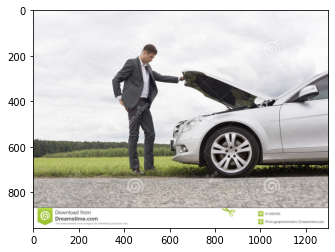

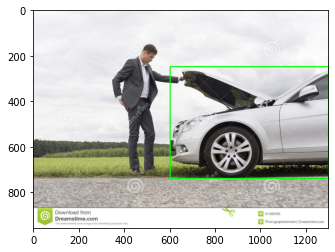

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
plt.figure()
# image = cv2.imread(image)
image = mpimg.imread(img)

plt.imshow(image)

IMAGE_SHAPE = image.shape
print('Image shape:',image.shape)
point1=(x,xm)
point2=(y,ym)
image = cv2.rectangle(image,point1,point2, color = (0, 255, 0), thickness = 3)
plt.figure()
plt.imshow(image)
print(image.shape)

#Blur the Image

In [26]:
from PIL import Image, ImageFilter
left, top, right, bottom = x,xm,y,ym
# Load the image
im = Image.open(img)

#crop the car
cropped_im = im.crop((left, top, right, bottom))
# Blur the image using a Gaussian blur filter
im_blurred = im.filter(ImageFilter.GaussianBlur(radius=3))

# Paste the blurred image back onto the original image
im_blurred.paste(cropped_im, (left, top))

# Save the blurred image
im_blurred.save('full_gaus_blurred_image.jpg')


#Crop outside of the predicted box

In [25]:
from PIL import Image

# Load the image and the bounding box coordinates
im = Image.open(img)
left, top, right, bottom = x,xm,y,ym

# Crop the image to the bounding box
im = im.crop((left, top, right, bottom))

# Save the cropped image
im.save('cropped_image.jpg')

For segmentation check https://stackabuse.com/instance-segmentation-with-yolov7-in-python/
